<a href="https://colab.research.google.com/github/simonvelezt/Analitica/blob/main/reto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Cargar librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#prestamo interbibliotecario

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. se cargan los archivos - analisis a priori

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


esta es la matriz de correlacion:
           Enroll       Age    Income     Hours
Enroll  1.000000  0.644033  0.476372 -0.048184
Age     0.644033  1.000000  0.450562 -0.040133
Income  0.476372  0.450562  1.000000 -0.018196
Hours  -0.048184 -0.040133 -0.018196  1.000000


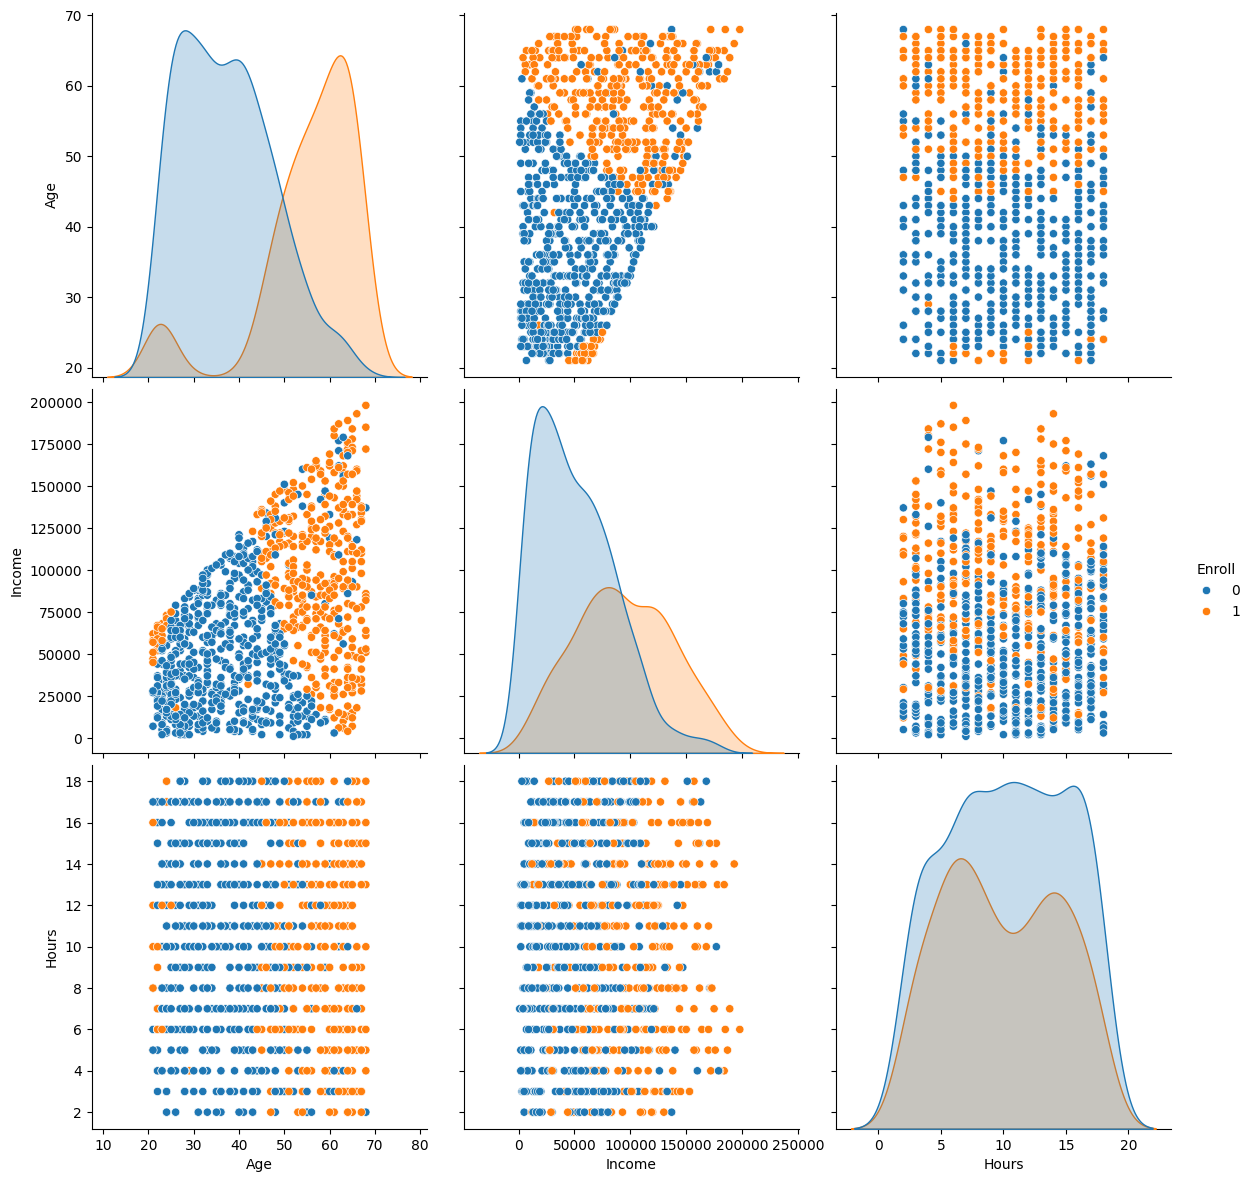

In [ ]:
nxl='/content/drive/MyDrive/ANALISIS DE DATOS/3. BD1-GymData_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head()
XDB=XDB.dropna()
XDB.head(100) #mostrar primeras 100 filas
XDB=XDB[['Enroll','Age','Income','Hours']]
sns.pairplot(XDB,hue='Enroll',size=4,vars=['Age','Income','Hours'])

#para confirmar la buena correlacion

corr=XDB.corr()
print("esta es la matriz de correlacion:\n",corr)

#se procede con la configuracion de los datos de entrada y salida

XD=np.array(XDB.iloc[:,0:3]) #toma las variables de entrada: Age, Income, Hours
YD=np.array(XDB.iloc[:,1]) #Enroll


2. se procede con la implementacion del KNN (modelo)

esta es la matriz de confusion:
 [[ 9  1  0 ...  0  0  0]
 [ 0 19  0 ...  0  0  0]
 [ 2  5 14 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0  2]]
exactitud: 0.9655172413793104
sensibilidad: 1.0
especificidad: 0.9
precission: 0.95
esta es la prediccion:
 [29]


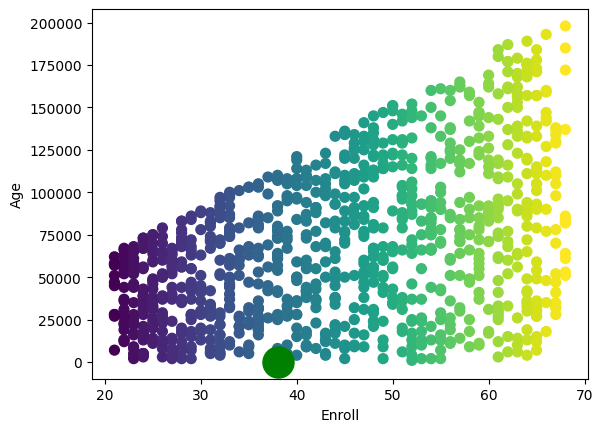

In [ ]:
mknn=KNeighborsClassifier(n_neighbors=3)
mknn.fit(XD,YD)

#evaluamos como funciono nuestro modelo

ydp=mknn.predict(XD)

#matriz de confusion

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(YD,ydp)
print("esta es la matriz de confusion:\n",cm)

VN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
VP=cm[1,1]

exactitud=(VP+VN)/(VP+VN+FP+FN)
sensibilidad=VP/(VP+FN)
especificidad=VN/(VN+FP)
precission=VP/(VP+FP)
print("exactitud:",exactitud)
print("sensibilidad:",sensibilidad)
print("especificidad:",especificidad)
print("precission:",precission)

#membresia o no
XDP=np.array([[22,38,67]])
ydpp=mknn.predict(XDP)
print("esta es la prediccion:\n",ydpp)


#las graficas seimpre se hacen con las variables que tienen mas correlacion

plt.scatter(XD[:,1],XD[:,2],c=YD,s=50,cmap='viridis')
plt.scatter(XDP[:,1],XDP[:,2],marker='o',s=500,facecolors='green')
plt.xlabel('Enroll')
plt.ylabel('Age')
plt.show()

3. se procede con la construccion del k-means (montoncitos de datos o clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


donde quedo el primer solitante 3
donde quedo el segundo solitante 3
donde quedo el tercer solitante 1


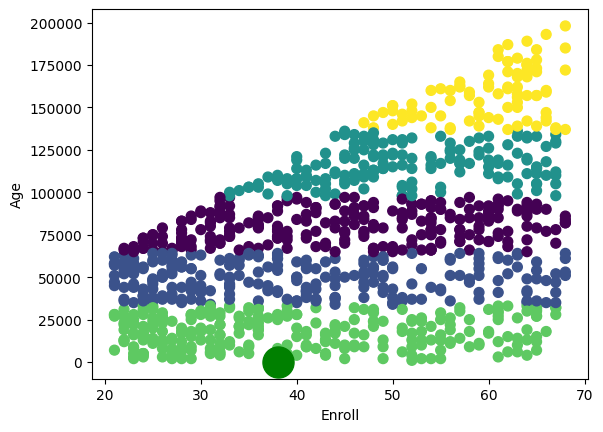

el modelo me presta [3]


ZeroDivisionError: division by zero

In [ ]:
np.random.seed(42) #para que ha todos nos de el mismo modelo
mkm=KMeans(n_clusters=5,init='random',random_state=42)
mkm.fit(XD,YD)
labels=mkm.labels_ #donde quedaron clasificados cada uno de los solitantes
print("donde quedo el primer solitante",labels[0])
print("donde quedo el segundo solitante",labels[1])
print("donde quedo el tercer solitante",labels[2])

#se mapean los clusters
plt.scatter(XD[:,1],XD[:,2],c=labels,s=50,cmap='viridis')
plt.scatter(XDP[:,1],XDP[:,2],marker='o',s=500,facecolors='green')
plt.xlabel('Enroll');plt.ylabel('Age')
plt.show()

#donde quedo yo
XDP=np.array([[22,38,67]])
ydpp2=mkm.predict(XDP)
print("el modelo me presta",ydpp2)

#cual es el porcentaje de preaprobados y negados del cluster 2

c20=len(np.where((labels==2) & (YD==0))[0])
c21=len(np.where((labels==2) & (YD==1))[0])
print("el porcentaje de negados para el cluster 2 es:",c20/(c20+c21))
print("el porcentaje de preaprobados para el cluster 2 es:",c21/(c20+c21))

c50=len(np.where((labels==4) & (YD==0))[0])
c51=len(np.where((labels==4) & (YD==1))[0])
print("el porcentaje de negados para el cluster 5 es:",c50/(c50+c51))
print("el porcentaje de preaprobados para el cluster 5 es:",c51/(c50+c51))

#cual es lo caracteristico sociodemografico de cada cluster

clusters=mkm.cluster_centers_
print("caracteristicas sociodemograficas de cada cluster:\n",clusters)